<a href="https://colab.research.google.com/github/llasso05/Hello_World/blob/main/TwitterApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Twitter Sentiment Analysis

Twitter is an American microblogging and social networking service on which users post and interact with messages known as "tweets". Registered users can post, like and retweet tweets, but unregistered users can only read them. Users access Twitter through its website interface or its mobile-device application software ("app"), though the service could also be accessed via SMS before April 2020. Twitter, Inc. is based in San Francisco, California, and has more than 25 offices around the world.Tweets were originally restricted to 140 characters, but was doubled to 280 for non-CJK languages in November 2017.

Twitter boasts 330 million monthly active users, which allows businesses to reach a broad audience and connect with customers without intermediaries. On the downside, there’s so much information that it’s hard for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

In [1]:
#importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Twitter Developer Account Access 
To get access to a twitter developer account you'll need to request access to twitter developers through link https://developer.twitter.com/en/apply-for-access . Be very specific with your request and send sample links with the examples of your intentions.

In [2]:
# Authentication
consumerKey = '35W9VaMCjZB6sr2HeliklQ7ME'
consumerSecret = '4aYLWKsT1x0Hu1vNE6fL75rIFP0ApwRM3QmkWpMDMwBCEqFzje'
bearerToken = 'AAAAAAAAAAAAAAAAAAAAAIL4NgEAAAAA6Tz8K3E7Q%2B%2Fpwt4arAJKWXMtU14%3Dsr6UE3jgnDz4CTB4BiSyt1zisFhdWaQ66ugucYRfqseTOMmz6e'
accessToken = '1370879432710311942-uGzGBdXivgwpVhbBHYXNmqMVjCShbY'
accessTokenSecret = 'OoN2DLa8f7IHRFPFl2oEvMhNljmc9REP8Ae4iLn5CLVwW'


#Python Try Except
The try block lets you test a block of code for errors.

The except block lets you handle el error.

The finally block lets you execute code, regardless of the result of the try and except blocks



In [3]:
try:
    auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
    auth.set_access_token(accessToken, accessTokenSecret)
    api = tweepy.API(auth)
except:
    print('Error: Authentication Failed')

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count=100, lang="en", tweet_mode= "extended")

print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i)+ ') '+ tweet.full_text+"\n")
  i=i+1

Show the 5 recent tweets: 

1) The best way to prevent new variants from emerging is by stopping transmission of the virus altogether: https://t.co/KhJoM3LBmr https://t.co/5Vhfsjew3D

2) It's encouraging to see innovation and clean energy investments at the forefront of @POTUS's #AmericanJobsPlan. Building markets for new energy technologies is good for jobs today and will build the economies we need while avoiding a climate disaster. https://t.co/V6GcPSiaH8

3) Here are five things you should know if you want to understand how variants are (and aren’t) complicating the pandemic. https://t.co/rANiDcZynJ

4) RT @IFPRI: 💡 From #climateadaptation to #genderequality, discover @CGIAR’s 50 years of innovations that changed the world 🌎 🎉: https://t.co…

5) The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big: https://t.co/jFWTPyaOAq https://t.co/PR5sxI7aDt



In [5]:
#Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [6]:
#.head is a function that prints the first 5 rows of a dataframe
df.head()

,Tweets
0,The best way to prevent new variants from emer...
1,It's encouraging to see innovation and clean e...
2,Here are five things you should know if you wa...
3,RT @IFPRI: 💡 From #climateadaptation to #gende...
4,The technological transformation we need to ad...


In [7]:
#Clean the text with a defined function
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+',"", text) #Remove @ mentions
  text = re.sub(r'#',"",text) #Removing all # symbol
  text = re.sub(r'RT[\s]+',"", text) # Removing the RT
  text = re.sub(r'https?:\/\/\S+',"",text) #Remove the hyper link

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show cleaned text

df


,Tweets
0,The best way to prevent new variants from emer...
1,It's encouraging to see innovation and clean e...
2,Here are five things you should know if you wa...
3,": 💡 From climateadaptation to genderequality, ..."
4,The technological transformation we need to ad...
...,...
95,"To reduce duplication, focus the government’s ..."
96,We need to revolutionize the world’s physical ...
97,This the most important thing the U.S. can do ...
98,I’m inspired by Quarraisha Abdool Karim and . ...


In [8]:
# Create a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Lets create 2 new columns to our data frame

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df


,Tweets,Subjectivity,Polarity
0,The best way to prevent new variants from emer...,0.377273,0.568182
1,It's encouraging to see innovation and clean e...,0.584848,0.401010
2,Here are five things you should know if you wa...,0.000000,0.000000
3,": 💡 From climateadaptation to genderequality, ...",0.000000,0.000000
4,The technological transformation we need to ad...,0.425000,0.425000
...,...,...,...
95,"To reduce duplication, focus the government’s ...",0.477273,0.318182
96,We need to revolutionize the world’s physical ...,0.372619,-0.186111
97,This the most important thing the U.S. can do ...,0.750000,0.450000
98,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000


# Wordclouds

Now that we have a good dataset we would want to see how well the sentiments are distributed. A good way to understand this is to use a wordcloud seen how common words are repeated.

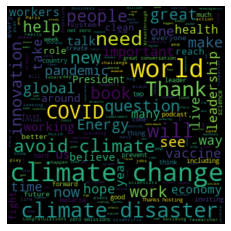

In [9]:
# Plot The Word Cloud
allWords = ' '.join([tweet for tweet in df['Tweets']])
wordCloud = WordCloud(width=300, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [10]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0 :
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,The best way to prevent new variants from emer...,0.377273,0.568182,Positive
1,It's encouraging to see innovation and clean e...,0.584848,0.401010,Positive
2,Here are five things you should know if you wa...,0.000000,0.000000,Neutral
3,": 💡 From climateadaptation to genderequality, ...",0.000000,0.000000,Neutral
4,The technological transformation we need to ad...,0.425000,0.425000,Positive
...,...,...,...,...
95,"To reduce duplication, focus the government’s ...",0.477273,0.318182,Positive
96,We need to revolutionize the world’s physical ...,0.372619,-0.186111,Negative
97,This the most important thing the U.S. can do ...,0.750000,0.450000,Positive
98,I’m inspired by Quarraisha Abdool Karim and . ...,0.500000,0.500000,Positive


In [15]:
# Lets print all positive tweets
j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
               if(sortedDf['Analysis'][i] == 'Positive'):
                 print(str(j)+') '+sortedDf['Tweets'][i])
               print()
               j = j+1
               

1) The best way to prevent new variants from emerging is by stopping transmission of the virus altogether:  

2) It's encouraging to see innovation and clean energy investments at the forefront of 's AmericanJobsPlan. Building markets for new energy technologies is good for jobs today and will build the economies we need while avoiding a climate disaster. 



5) The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big:  

6) I had a great time answering questions about my new book, climate change, and COVID-19 on  last week. Here’s a recap of the conversation. 



9) In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on  at 11:15:  




13) I named my book “How to Avoid a Climate Disaster,” not “How to Stop Climate Change,” because our climate is already changing—and no 

In [16]:
# Lets print all Negative tweets
j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
               if(sortedDf['Analysis'][i] == 'Negative'):
                 print(str(j)+') '+sortedDf['Tweets'][i])
               print()
               j = j+1
               











11) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

12) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…




16) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 






22) : Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…






28) Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at home and around the world. This type of observation system will help scientists monitor and predict future weather events. 




32) There are several ways individuals can help move us closer to a zer

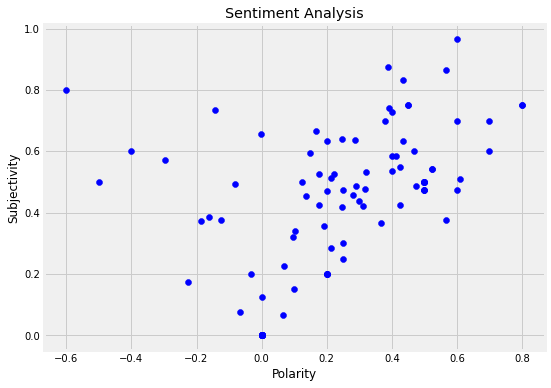

In [19]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [21]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

71.0

In [22]:
# Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

13.0

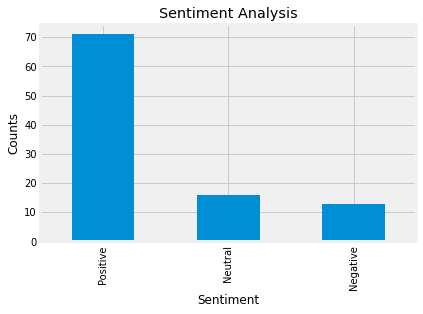

In [24]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()